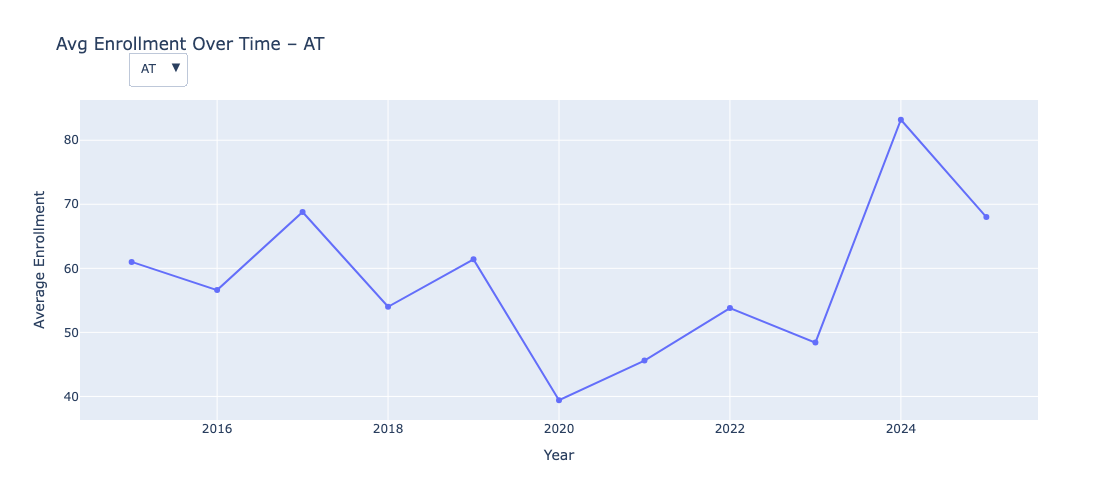

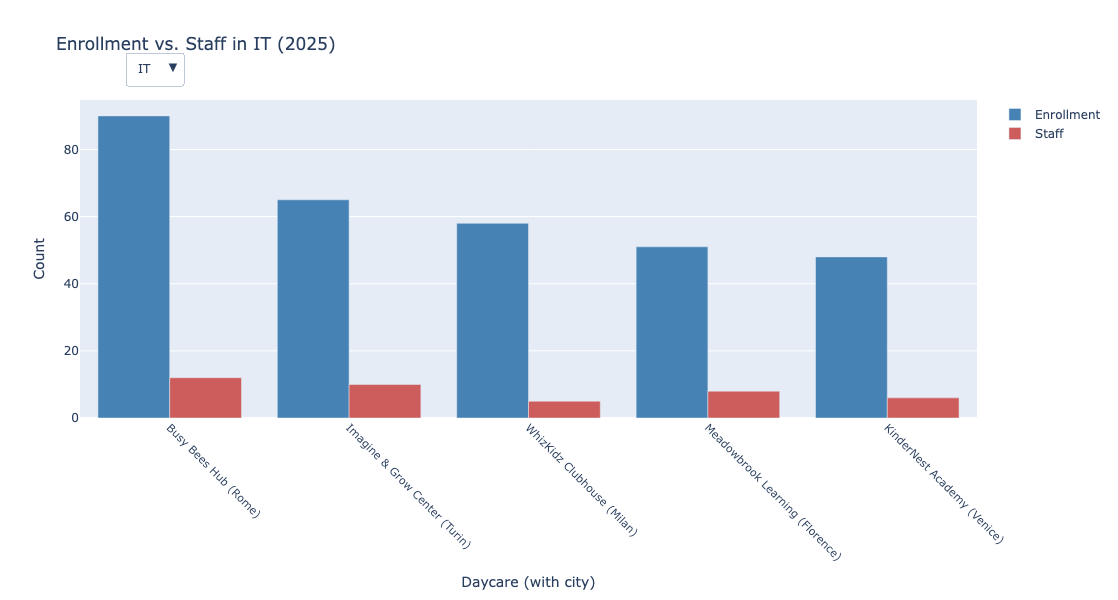

In [9]:
import pandas as pd
import plotly.graph_objects as go

#

# datasets
df_data = pd.read_csv("DaycareData.csv")
df_locations = pd.read_csv("DaycareLocations.csv", encoding="ISO-8859-1")

# Merge 
df = pd.merge(df_data, df_locations, on="daycare_id")
df = df[df["inactive"] == False]  # only active daycares
df["year"] = df["year"].astype(int)

# Add unique labels for duplicate daycare names
df["daycare_display_name"] = df["daycare_name"] + " (" + df["city"] + ")"

# LINE CHART 

# Avg enrollment per country per year
trend_df = df.groupby(["country_code", "year"])["enrollment"].mean().reset_index()
countries = trend_df["country_code"].unique()

fig_line = go.Figure()

#  one trace per country
for country in countries:
    country_df = trend_df[trend_df["country_code"] == country]
    fig_line.add_trace(go.Scatter(
        x=country_df["year"],
        y=country_df["enrollment"],
        mode='lines+markers',
        name=country,
        visible=(country == countries[0])
    ))

# Dropdown 
line_dropdown = [
    {
        "label": country,
        "method": "update",
        "args": [
            {"visible": [c == country for c in countries]},
            {"title": f"Avg Enrollment Over Time – {country}"}
        ]
    }
    for country in countries
]

fig_line.update_layout(
    updatemenus=[{
        "buttons": line_dropdown,
        "direction": "down",
        "x": 0.05,
        "xanchor": "left",
        "y": 1.15,
        "yanchor": "top",
        "showactive": True,
    }],
    title=f"Avg Enrollment Over Time – {countries[0]}",
    xaxis_title="Year",
    yaxis_title="Average Enrollment",
    height=500
)

fig_line.show()

# BARRR
# latest year 
latest_year = df["year"].max()
latest_df = df[df["year"] == latest_year]
countries_bar = latest_df["country_code"].unique()

fig_bar = go.Figure()

# two bars (enrollment + staff) per daycare, per country
for country in countries_bar:
    df_country = latest_df[latest_df["country_code"] == country].copy()
    df_country.sort_values(by="enrollment", ascending=False, inplace=True)

    fig_bar.add_trace(go.Bar(
        x=df_country["daycare_display_name"],
        y=df_country["enrollment"],
        name="Enrollment",
        marker_color="steelblue",
        visible=(country == countries_bar[0])
    ))

    fig_bar.add_trace(go.Bar(
        x=df_country["daycare_display_name"],
        y=df_country["staff"],
        name="Staff",
        marker_color="indianred",
        visible=(country == countries_bar[0])
    ))

# dropdown for bar chart
bar_dropdown = [
    {
        "label": country,
        "method": "update",
        "args": [
            {"visible": [i // 2 == idx for i in range(2 * len(countries_bar))]},
            {"title": f"Enrollment vs. Staff in {country} ({latest_year})"}
        ]
    }
    for idx, country in enumerate(countries_bar)
]

fig_bar.update_layout(
    updatemenus=[{
        "buttons": bar_dropdown,
        "direction": "down",
        "x": 0.05,
        "xanchor": "left",
        "y": 1.15,
        "yanchor": "top",
        "showactive": True,
    }],
    title=f"Enrollment vs. Staff in {countries_bar[0]} ({latest_year})",
    barmode="group",
    xaxis=dict(
        title="Daycare (with city)",
        tickangle=45,
        tickfont=dict(size=11),
        title_font=dict(size=14),
    ),
    yaxis=dict(
        title="Count",
        title_font=dict(size=14),
        tickformat=",",
        tickfont=dict(size=12),
    ),
    height=600
)

fig_bar.show()

